# Project 1
Alex
Claire
Steve
Sylvia

This project explores data analysis of cryptocurrencies.

In [8]:
import os
from dotenv import load_dotenv
from pathlib import Path
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd


## Import data

In [9]:
filepath=Path("Resources/Proj_One_Data.csv")

merged_BTCETH = pd.read_csv(filepath, parse_dates=True)
print(merged_BTCETH.dtypes)


merged_BTCETH

Date       object
BTCUSD    float64
ETHUSD    float64
dtype: object


,Date,BTCUSD,ETHUSD
0,2016-10-14,638.03,11.92
1,2016-10-15,638.16,11.95
2,2016-10-16,641.92,11.95
3,2016-10-17,639.56,11.96
4,2016-10-18,635.11,12.54
...,...,...,...
1808,2021-09-26,43228.50,3064.64
1809,2021-09-27,42171.70,2927.15
1810,2021-09-28,41049.00,2807.19
1811,2021-09-29,41522.10,2848.28


In [10]:
merged_BTCETH.dtypes

Date       object
BTCUSD    float64
ETHUSD    float64
dtype: object

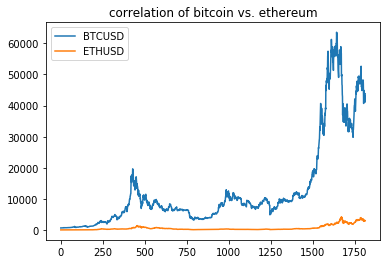

In [11]:
# Plot the data trends of the bitcoin vs. ethereum over these years
merged_BTCETH.plot(title='correlation of bitcoin vs. ethereum')

 ### Scaling Prices

In [12]:
merged_BTCETH["BTC_norm"]=merged_BTCETH["BTCUSD"] / merged_BTCETH["BTCUSD"].abs().max()

In [13]:
merged_BTCETH

,Date,BTCUSD,ETHUSD,BTC_norm
0,2016-10-14,638.03,11.92,0.010034
1,2016-10-15,638.16,11.95,0.010036
2,2016-10-16,641.92,11.95,0.010095
3,2016-10-17,639.56,11.96,0.010058
4,2016-10-18,635.11,12.54,0.009988
...,...,...,...,...
1808,2021-09-26,43228.50,3064.64,0.679820
1809,2021-09-27,42171.70,2927.15,0.663200
1810,2021-09-28,41049.00,2807.19,0.645544
1811,2021-09-29,41522.10,2848.28,0.652984


In [14]:
merged_BTCETH["ETH_norm"]=merged_BTCETH["ETHUSD"] / merged_BTCETH["ETHUSD"].abs().max()

In [15]:
merged_BTCETH

,Date,BTCUSD,ETHUSD,BTC_norm,ETH_norm
0,2016-10-14,638.03,11.92,0.010034,0.002852
1,2016-10-15,638.16,11.95,0.010036,0.002859
2,2016-10-16,641.92,11.95,0.010095,0.002859
3,2016-10-17,639.56,11.96,0.010058,0.002861
4,2016-10-18,635.11,12.54,0.009988,0.003000
...,...,...,...,...,...
1808,2021-09-26,43228.50,3064.64,0.679820,0.733201
1809,2021-09-27,42171.70,2927.15,0.663200,0.700307
1810,2021-09-28,41049.00,2807.19,0.645544,0.671607
1811,2021-09-29,41522.10,2848.28,0.652984,0.681438


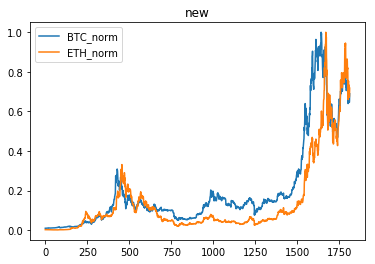

In [16]:
merged_BTCETH[['BTC_norm', 'ETH_norm']].plot(title='new')

### Returns data for better understanding

In [17]:
btceth_returns = merged_BTCETH.pct_change()
btceth_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

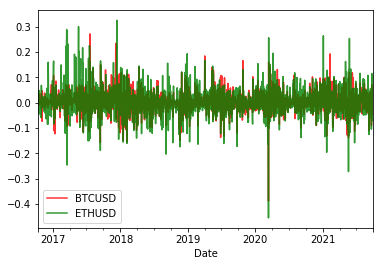

In [69]:
# Plot the daily returns of Bitcoin and Ethernet
btceth_returns[["BTCUSD","ETHUSD"]].plot(alpha=0.8, color=["r","g"]) 

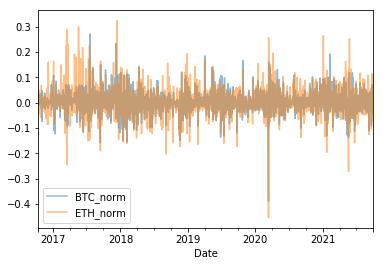

In [65]:
btceth_returns[["BTC_norm","ETH_norm"]].plot(alpha=0.5)

### Correlations

In [15]:
correlation = btceth_returns.corr()
correlation

,BTCUSD,ETHUSD,BTC_norm,ETH_norm
BTCUSD,1.000000,0.667167,1.000000,0.667167
ETHUSD,0.667167,1.000000,0.667167,1.000000
BTC_norm,1.000000,0.667167,1.000000,0.667167
ETH_norm,0.667167,1.000000,0.667167,1.000000


### Create Bins for perspective

In [16]:
# Create the variable bins to define our bounds for when we cut the dataframe.
bins = [0, 10000, 35000, 50000, 70000]

# Create names for the bins
group_names = ["Low", "Moderate", "Above Average", "High"]

### Label Price Ranges According to the Corresponding Bin¶


In [17]:
# Add a column named "Salary Level" to people_df and slice the data into the bins
merged_BTCETH["BTC_Price_Range"] = pd.cut(merged_BTCETH["BTCUSD"], bins, labels=group_names)

merged_BTCETH.head()

,BTCUSD,ETHUSD,BTC_norm,ETH_norm,BTC_Price_Range
Date,,,,,
2016-10-14,638.03,11.92,0.010034,0.002852,Low
2016-10-15,638.16,11.95,0.010036,0.002859,Low
2016-10-16,641.92,11.95,0.010095,0.002859,Low
2016-10-17,639.56,11.96,0.010058,0.002861,Low
2016-10-18,635.11,12.54,0.009988,0.003000,Low


### Create Parallel Plot

In [18]:
#import calendar
# merged_BTCETH['Year'] = merged_BTCETH["Date"].dt.year


In [25]:
merged_BTCETH_new=merged_BTCETH.reset_index()
merged_BTCETH_new.head()

,Date,BTCUSD,ETHUSD,BTC_norm,ETH_norm,BTC_Price_Range
0,2016-10-14,638.03,11.92,0.010034,0.002852,Low
1,2016-10-15,638.16,11.95,0.010036,0.002859,Low
2,2016-10-16,641.92,11.95,0.010095,0.002859,Low
3,2016-10-17,639.56,11.96,0.010058,0.002861,Low
4,2016-10-18,635.11,12.54,0.009988,0.003000,Low


In [47]:
merged_BTCETH_new['Date'].dt.year
merged_BTCETH_new["Year"] = merged_BTCETH_new['Date'].dt.year
merged_BTCETH_year_mean= merged_BTCETH_new.groupby('Year')[["BTCUSD","ETHUSD","BTC_norm","ETH_norm"]].mean()
merged_BTCETH_year_mean =merged_BTCETH_year_mean.reset_index()
merged_BTCETH_new

,Date,BTCUSD,ETHUSD,BTC_norm,ETH_norm,BTC_Price_Range,Year
0,2016-10-14,638.03,11.92,0.010034,0.002852,Low,2016
1,2016-10-15,638.16,11.95,0.010036,0.002859,Low,2016
2,2016-10-16,641.92,11.95,0.010095,0.002859,Low,2016
3,2016-10-17,639.56,11.96,0.010058,0.002861,Low,2016
4,2016-10-18,635.11,12.54,0.009988,0.003000,Low,2016
...,...,...,...,...,...,...,...
1808,2021-09-26,43228.50,3064.64,0.679820,0.733201,Above Average,2021
1809,2021-09-27,42171.70,2927.15,0.663200,0.700307,Above Average,2021
1810,2021-09-28,41049.00,2807.19,0.645544,0.671607,Above Average,2021
1811,2021-09-29,41522.10,2848.28,0.652984,0.681438,Above Average,2021


In [21]:
#import calendar
# merged_BTCETH = merged_BTCETH["Date"].dt.year

#combined_final = merged_BTCETH
#combined_final = combined_final.set_index('Date')
#annual = combined_final.resample("A").mean()
#annual


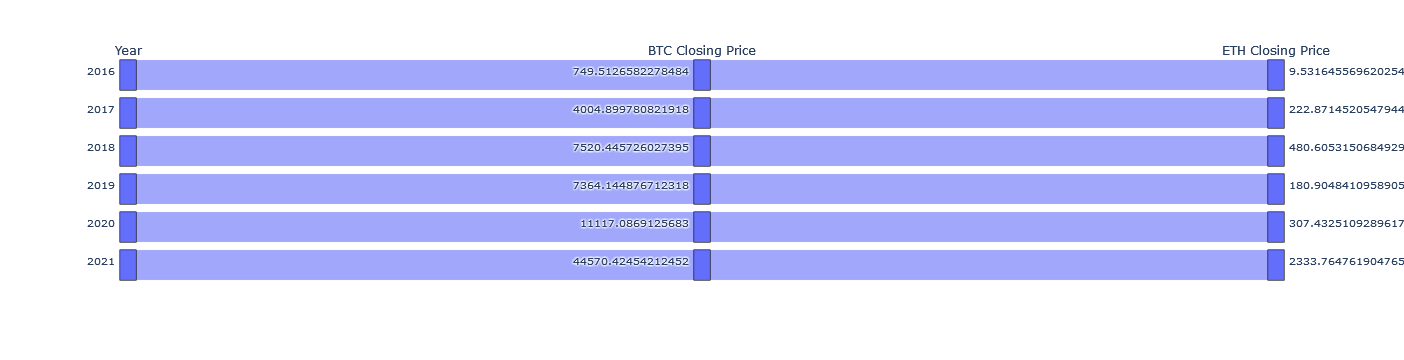

In [32]:
# Plot data using parallel_categories
px.parallel_categories(
    merged_BTCETH_year_mean,
    dimensions=["Year", "BTCUSD", "ETHUSD"],
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "Year" : "Year",
        "BTCUSD": "BTC Closing Price",
        "ETHUSD": "ETH Closing Price",
    }
)



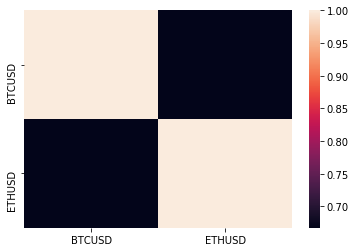

In [38]:
merged_returns = merged_BTCETH[["BTCUSD","ETHUSD"]].pct_change()
merged_returns
correlation = merged_returns.corr()
correlation
sns.heatmap(correlation)

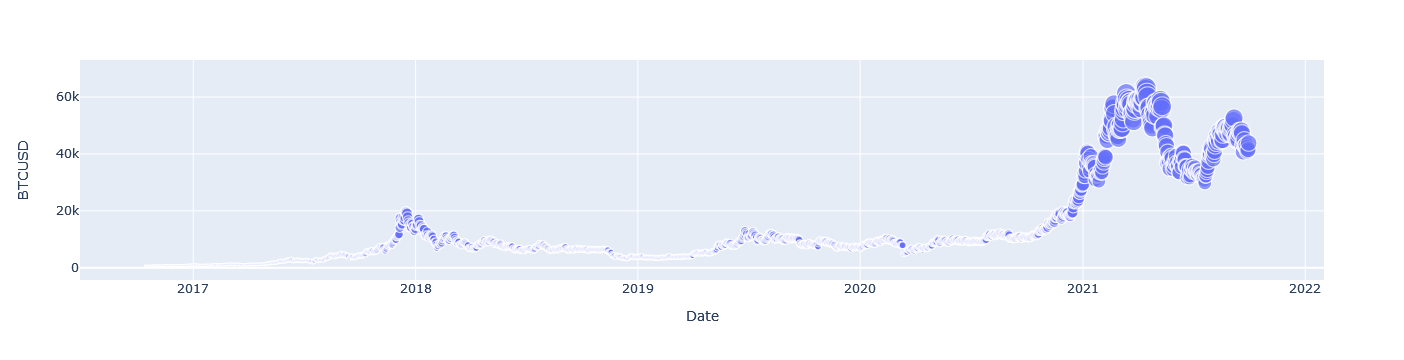

In [40]:
# Create scatter plot
px.scatter(merged_BTCETH_new, x="Date", y="BTCUSD", size="BTCUSD")

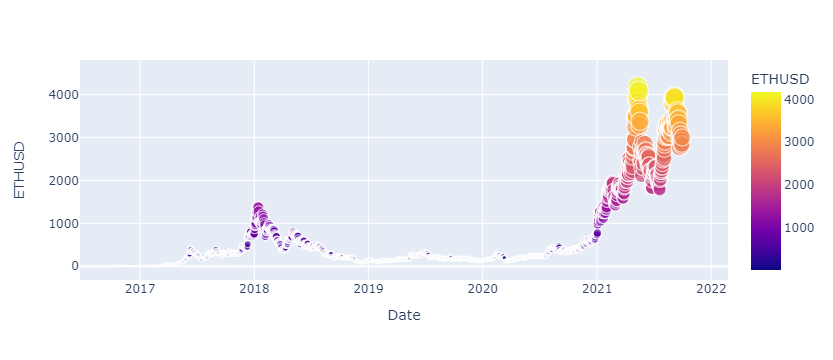

In [45]:
# Create scatter plot
px.scatter(merged_BTCETH_new, x="Date", y="ETHUSD", size="ETHUSD", color='ETHUSD')

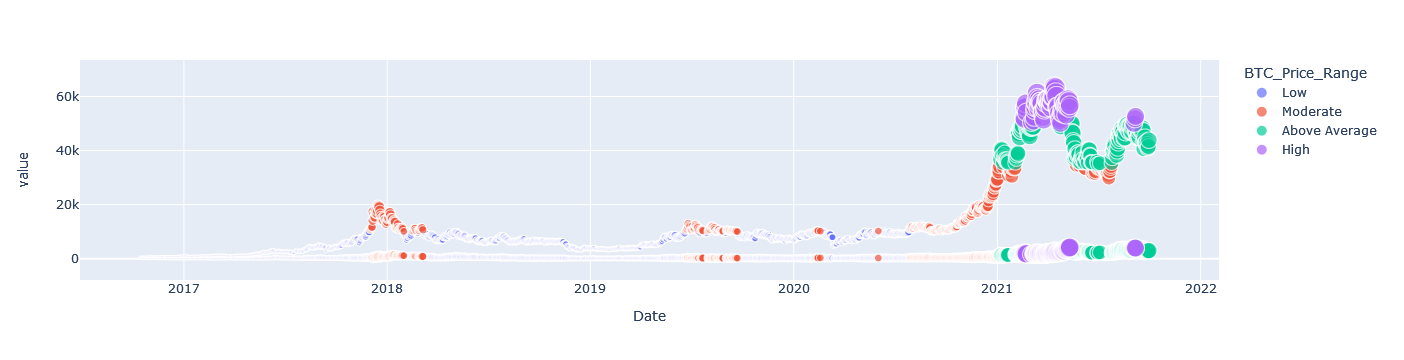

In [48]:
# Create scatter plot comparing average sale price and cost of living index
px.scatter(
    merged_BTCETH_new,  # feed it the df
    x="Date",  # x, identify the desired columns
    y=["BTCUSD","ETHUSD"],  # y
    size="BTC_norm",  # z
    color="BTC_Price_Range",  # z2 - many dimensions!
)


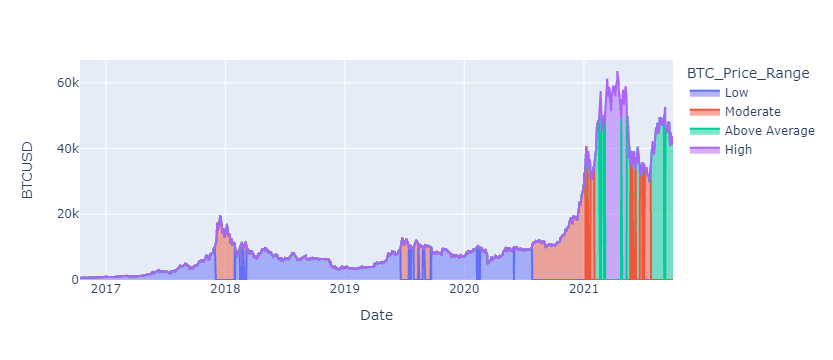

In [55]:
# Create area plot
px.area(
    merged_BTCETH_new,
    x="Date",
    y="BTCUSD",
    color="BTC_Price_Range",
    line_group="BTC_Price_Range",
)

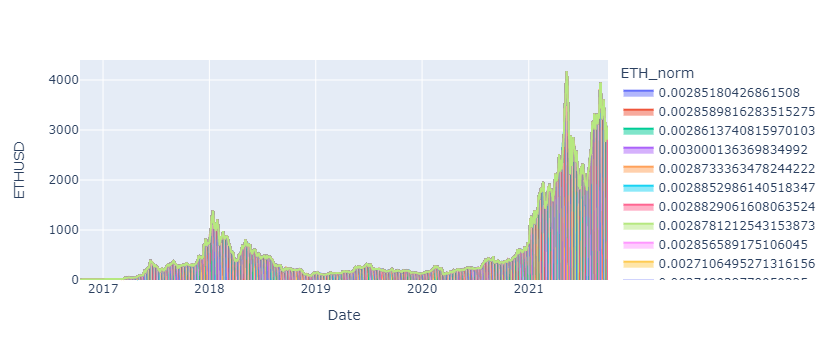

In [57]:
# Create area plot
px.area(
    merged_BTCETH_new,
    x="Date",
    y="ETHUSD",
    color="ETH_norm",
    line_group="ETHUSD",
)